In [1]:
import numpy as np
import numpy.random as ra
import matplotlib.pyplot as plt

In [2]:
def BrownianMotion(stepsize=0.01, time=1):
    return np.concatenate(([0], np.cumsum(ra.normal(scale=np.sqrt(stepsize), size=int(time/stepsize)))))

In [8]:
def PoissonProcess(stepsize=0.01, time=10):
    return np.concatenate(([0], np.cumsum(ra.poisson(lam=stepsize, size=int(time/stepsize)))))

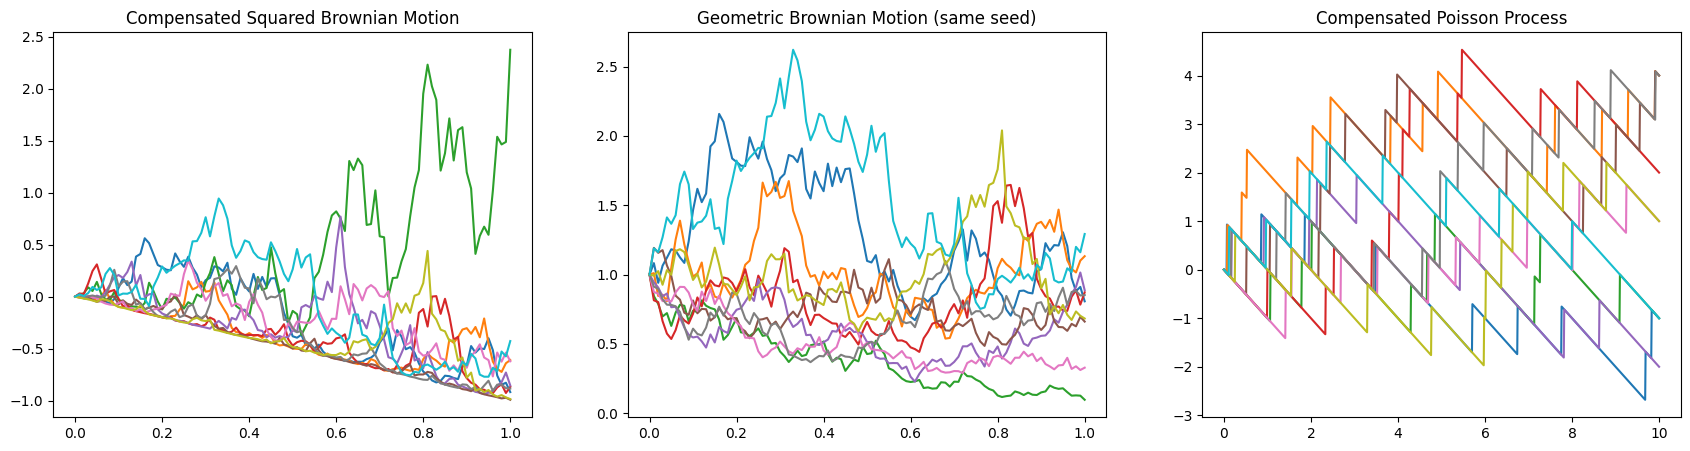

In [18]:
# some martingales

plt.figure(figsize=(21,5))

s = int(100 * ra.uniform())

ra.seed(s)
plt.subplot(1,3,1)
for _ in range(10):
    B = BrownianMotion()
    x = [t/100 for t, _ in enumerate(B)]
    y = [b**2 - t/100 for t, b in enumerate(B)]
    plt.plot(x,y)
plt.title("Compensated Squared Brownian Motion")

ra.seed(s)
plt.subplot(1,3,2)
for _ in range(10):
    B = BrownianMotion()
    x = [t/100 for t, _ in enumerate(B)]
    y = [np.exp(b - t/200) for t, b in enumerate(B)]
    plt.plot(x,y)
plt.title("Geometric Brownian Motion (same seed)")

ra.seed(s)
plt.subplot(1,3,3)
for _ in range(10):
    N = PoissonProcess()
    x = [t/100 for t, _ in enumerate(N)]
    y = [n - t/100 for t, n in enumerate(N)]
    plt.plot(x,y)
plt.title("Compensated Poisson Process")

plt.show()

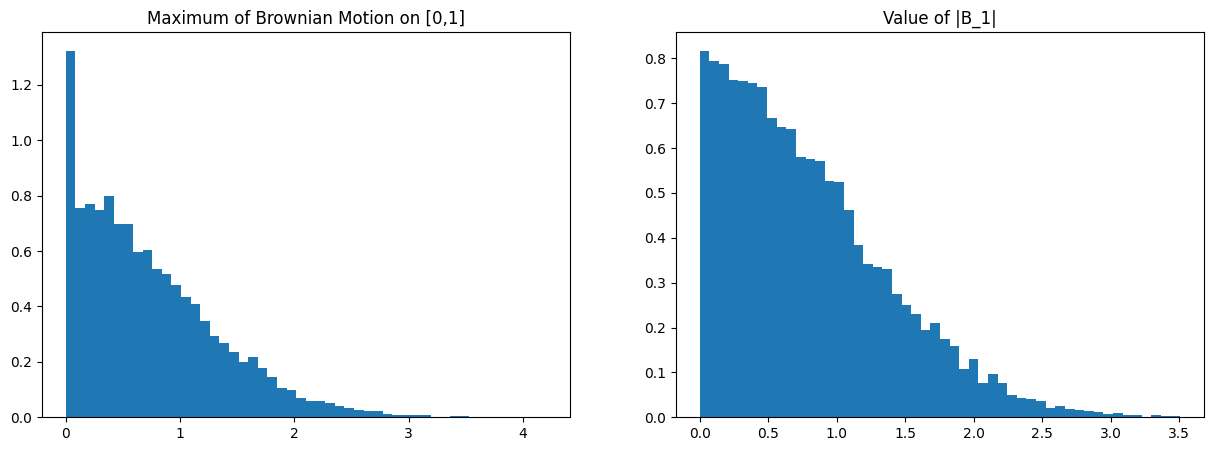

In [27]:
# Maximum vs Absolute Endpoint

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
maxbm = [ np.max(BrownianMotion()) for _ in range(10000) ]
plt.hist(maxbm, density=True, bins=50)
plt.title("Maximum of Brownian Motion on [0,1]")

plt.subplot(1,2,2)
absen = [ np.abs(BrownianMotion()[-1]) for _ in range(10000) ]
plt.hist(absen, density=True, bins=50)
plt.title("Value of |B_1|")

plt.show()

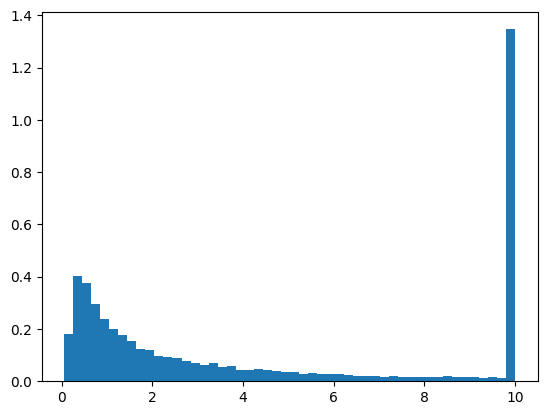

Average: 4.363857
Proportion at least 10: 0.2654


In [39]:
# First Passage Time

def tau(B):
    return np.min([ t/100 if b >= 1 else 10 for t, b in enumerate(B) ])

tausamples = [tau(BrownianMotion(time=10)) for _ in range(10000)]
plt.hist(tausamples, bins=50, density=True)
plt.show()

print(f'Average: {np.average(tausamples)}')
print(f'Proportion at least 10: {np.average([1 if t >= 10 else 0 for t in tausamples])}')

In [51]:
# Gambler's Ruin at the French Roulette

N = 5000

def RandomWalk(start=100, steps=N):
    w = [start]
    for _ in range(steps):
        w.append(w[-1] + (1 if ra.uniform() < 18/38 else -1))
    return w

def tau200(W):
    return np.min([ t if w >= 200 else N for t, w in enumerate(W) ])

def tau0(W):
    return np.min([ t if w <= 0 else N for t, w in enumerate(W) ])

print(f'Probability of Reaching $200 before $0: {np.average([1 if tau200(W) < tau0(W) else 0 for W in [RandomWalk(start=199) for _ in range(100)]])}')

Probability of Reaching $200 before $0: 0.94


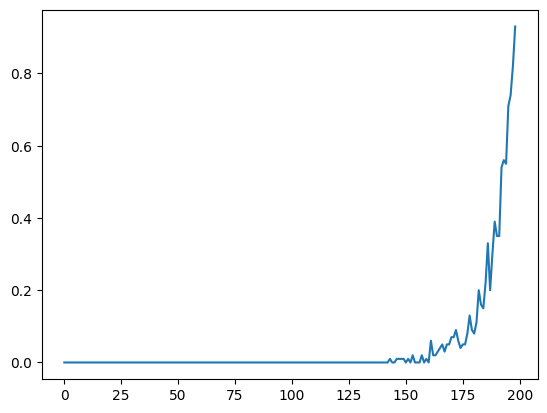

In [53]:
def probability(s0=100, numtrials=100):
    return np.average([1 if tau200(W) < tau0(W) else 0 for W in [RandomWalk(start=s0) for _ in range(numtrials)]])

data = [probability(s0) for s0 in range(1,200)]

plt.plot(data)
plt.show()